<center>
<h1>Assignment 1 : Reccommender Systems</h1>
<h3>Part 1 - Python Notebook </h3>
Duijn, Nicolette, s3026752<br>
Elangovan, Abhiram, s3442403 <br>
van Vliet, Nick, s3442403
</center>

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold 
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#!pip install sweetviz
#import sweetviz as sv

In [24]:
# Reading dataset
dataset = pd.read_table('ratings.dat', header = None, sep = '::', engine = 'python', usecols = [0,1,2], names = ('UserID','MovieID', 'Ratings'))

#eda = sv.analyze(dataset)
#eda.show_html()

# Task 1.1 Naive Approaches

In [3]:
# Make the cross validation

n_splits = 5
KF = KFold(n_splits=n_splits, random_state=123, shuffle=True)

# Create Lists 
GlobalAvergage_RMSE, UserAverage_RMSE, MovieAverage_RMSE, LinReg_RMSE, LinRegInter_RMSE = list(),list(),list(),list(),list()
GlobalAvergage_MAE, UserAverage_MAE, MovieAverage_MAE, LinReg_MAE, LinRegInter_MAE = list(),list(),list(),list(),list()

GlobalAvergage_RMSE_test, UserAverage_RMSE_test, MovieAverage_RMSE_test, LinReg_RMSE_test, LinRegInter_RMSE_test = list(),list(),list(),list(),list()
GlobalAvergage_MAE_test, UserAverage_MAE_test, MovieAverage_MAE_test, LinReg_MAE_test, LinRegInter_MAE_test = list(),list(),list(),list(),list()

In [4]:
# Naive Approach - Global Average

start = time.time()

for train, test in KF.split(dataset):
    #Define X and y in train and test
    X_train, X_test = dataset.iloc[train, 0:2], dataset.iloc[test, 0:2]
    y_train, y_test = dataset.iloc[train, -1], dataset.iloc[test, -1]
    
    # Models
    GlobalAvergage = y_train.mean()

    # Predictions 
    pred_GlobalAvergage = [GlobalAvergage] * len(X_train) 
    pred_GlobalAvergage_test = [GlobalAvergage] * len(X_test)
   
    #RMSE's 
    RMSE_GlobalAvergage = math.sqrt(mean_squared_error(pred_GlobalAvergage,y_train))
    RMSE_GlobalAvergage_test = math.sqrt(mean_squared_error(pred_GlobalAvergage_test,y_test))

    GlobalAvergage_RMSE.append(RMSE_GlobalAvergage)
    GlobalAvergage_RMSE_test.append(RMSE_GlobalAvergage_test)

 
    # MAE's 
    MAE_GlobalAvergage = mae(pred_GlobalAvergage, y_train)
    MAE_GlobalAvergage_test = mae(pred_GlobalAvergage_test, y_test)

    
    GlobalAvergage_MAE.append(MAE_GlobalAvergage)
    GlobalAvergage_MAE_test.append(MAE_GlobalAvergage_test)
    
end = time.time()
tot_time = np.subtract(end, start)
print(f'Total runtime: {tot_time} s')    

Total runtime: 0.5993967056274414 s


In [5]:
def User(Train, Test):
    predicted = list()
    user_dict = {}
    Global_mean = Train['Ratings'].mean()
    avg_user = Train.groupby("UserID").mean()['Ratings']
    keys = avg_user.index.values
    for i in keys:
        user_dict[i] = avg_user[i]
    
    for u, m, r in np.array(Test):
        if u in user_dict:
            predicted.append(user_dict[u])
        else:
            predicted.append(Global_mean)
    
    return(predicted)

def Movie(Train, Test):
    predicted = list()
    movie_dict = {}
    Global_mean = Train['Ratings'].mean()
    avg_movie = Train.groupby("MovieID").mean()['Ratings']
    keys = avg_movie.index.values
    for i in keys:
        movie_dict[i] = avg_movie[i]
    
    for u, m, r in np.array(Test):
        if m in movie_dict:
            predicted.append(movie_dict[m])
        else:
            predicted.append(Global_mean)
    return(predicted)

In [6]:
# Naive Approach - User Average


start = time.time()

for train_indexes, test_indexes in KF.split(dataset):
    #Define train and test
    Train_set = dataset.iloc[train_indexes]
    Test_set = dataset.iloc[test_indexes]
    
    predicted_train = User(Train_set, Train_set)
    predicted_test = User(Train_set, Test_set)
    
    UserAverage_RMSE.append(np.sqrt(np.divide(np.sum(np.square(np.subtract(Train_set.iloc[:,2], predicted_train))), len(Train_set))))
    UserAverage_RMSE_test.append(np.sqrt(np.divide(np.sum(np.square(np.subtract(Test_set.iloc[:,2], predicted_test))), len(Test_set))))
    UserAverage_MAE.append(np.divide(np.sum(np.abs(np.subtract(Train_set.iloc[:,2], predicted_train))), len(Train_set)))
    UserAverage_MAE_test.append(np.divide(np.sum(np.abs(np.subtract(Test_set.iloc[:,2], predicted_test))), len(Test_set)))
end = time.time()
tot_time = np.subtract(end, start)
print(f'Total runtime: {tot_time} s')

Total runtime: 4.753164768218994 s


In [10]:
# Naive Approach - Movie Average


start = time.time()
for train_indexes, test_indexes in KF.split(dataset):
    #Define train and test
    Train_set = dataset.iloc[train_indexes]
    Test_set = dataset.iloc[test_indexes]
    
    predicted_train = Movie(Train_set, Train_set)
    predicted_test = Movie(Train_set, Test_set)
    
    MovieAverage_RMSE.append(np.sqrt(np.divide(np.sum(np.square(np.subtract(Train_set.iloc[:,2], predicted_train))), len(Train_set))))
    MovieAverage_RMSE_test.append(np.sqrt(np.divide(np.sum(np.square(np.subtract(Test_set.iloc[:,2], predicted_test))), len(Test_set))))
    MovieAverage_MAE.append(np.divide(np.sum(np.abs(np.subtract(Train_set.iloc[:,2], predicted_train))), len(Train_set)))
    MovieAverage_MAE_test.append(np.divide(np.sum(np.abs(np.subtract(Test_set.iloc[:,2], predicted_test))), len(Test_set)))

end = time.time()
tot_time = np.subtract(end, start)
print(f'Total runtime: {tot_time} s')

Total runtime: 4.811105489730835 s


In [11]:
# Naive Approach - Linear Regression


start = time.time()


for train, test in KF.split(dataset):
    #Define X and y in train and test
    X_train, X_test = dataset.iloc[train, 0:2], dataset.iloc[test, 0:2]
    y_train, y_test = dataset.iloc[train, -1], dataset.iloc[test, -1]
    
    # Models
    UserAverage = dataset.iloc[train]
    MovieAverage = dataset.iloc[train]
    
    UserAverage_test = dataset.iloc[test]
    MovieAverage_test = dataset.iloc[test]
    
    # Create dataframe for Linear Regression
    UserAverage = UserAverage['Ratings'].groupby(UserAverage['UserID'], group_keys=False).transform('mean') 
    MovieAverage = MovieAverage['Ratings'].groupby(MovieAverage['MovieID'], group_keys=False).transform('mean')
    X_lr = pd.DataFrame(columns = ['UserAverage', 'MovieAverage'])
    X_lr['UserAverage'] = UserAverage
    X_lr['MovieAverage'] = MovieAverage       
    modelLinReg = linear_model.LinearRegression(fit_intercept=False).fit(X_lr,y_train)
    
    UserAverage_test = UserAverage_test['Ratings'].groupby(UserAverage_test['UserID'], group_keys=False).transform('mean') 
    MovieAverage_test = MovieAverage_test['Ratings'].groupby(MovieAverage_test['MovieID'], group_keys=False).transform('mean')
    X_lr_test = pd.DataFrame(columns = ['UserAverage', 'MovieAverage'])
    X_lr_test['UserAverage'] = UserAverage_test
    X_lr_test['MovieAverage'] = MovieAverage_test           
    
    # Predictions 
    pred_LinReg = modelLinReg.predict(X_lr)
    pred_LinReg_test = modelLinReg.predict(X_lr_test)
    
    #RMSE's 
    RMSE_LinReg = math.sqrt(mean_squared_error(pred_LinReg,y_train))
    RMSE_LinReg_test = math.sqrt(mean_squared_error(pred_LinReg_test,y_test))
    
    LinReg_RMSE.append(RMSE_LinReg)
    LinReg_RMSE_test.append(RMSE_LinReg_test)
    
    # MAE's 
    MAE_LinReg = mae(pred_LinReg, np.asarray(y_train))
    MAE_LinReg_test = mae(pred_LinReg_test, y_test)

    LinReg_MAE.append(MAE_LinReg)
    LinReg_MAE_test.append(MAE_LinReg_test)
    

end = time.time()
tot_time = np.subtract(end, start)
print(f'Total runtime: {tot_time} s')

Total runtime: 1.2436778545379639 s


In [12]:
# Naive Approach - Linear Regression with Intercept


start = time.time()


for train, test in KF.split(dataset):
    #Define X and y in train and test
    X_train, X_test = dataset.iloc[train, 0:2], dataset.iloc[test, 0:2]
    y_train, y_test = dataset.iloc[train, -1], dataset.iloc[test, -1]
    
    # Models
    UserAverage = dataset.iloc[train]
    MovieAverage = dataset.iloc[train]
    
    UserAverage_test = dataset.iloc[test]
    MovieAverage_test = dataset.iloc[test]
    
    # Create dataframe for Linear Regression
    UserAverage = UserAverage['Ratings'].groupby(UserAverage['UserID'], group_keys=False).transform('mean') 
    MovieAverage = MovieAverage['Ratings'].groupby(MovieAverage['MovieID'], group_keys=False).transform('mean')
    X_lr_inter = pd.DataFrame(columns = ['UserAverage', 'MovieAverage'])
    X_lr_inter['UserAverage'] = UserAverage
    X_lr_inter['MovieAverage'] = MovieAverage       
    modelLinRegInter = linear_model.LinearRegression(fit_intercept=True).fit(X_lr_inter,y_train)
    
    UserAverage_test = UserAverage_test['Ratings'].groupby(UserAverage_test['UserID'], group_keys=False).transform('mean') 
    MovieAverage_test = MovieAverage_test['Ratings'].groupby(MovieAverage_test['MovieID'], group_keys=False).transform('mean')
    X_lr_test_inter = pd.DataFrame(columns = ['UserAverage', 'MovieAverage'])
    X_lr_test_inter['UserAverage'] = UserAverage_test
    X_lr_test_inter['MovieAverage'] = MovieAverage_test       
    
    # Predictions 
    pred_LinRegInter = modelLinRegInter.predict(X_lr_inter)
    pred_LinRegInter_test = modelLinRegInter.predict(X_lr_test_inter)
    
    #RMSE's 
    RMSE_LinRegInter = math.sqrt(mean_squared_error(pred_LinRegInter,y_train))
    RMSE_LinRegInter_test = math.sqrt(mean_squared_error(pred_LinRegInter_test,y_test))
    
    LinRegInter_RMSE.append(RMSE_LinRegInter)
    LinRegInter_RMSE_test.append(RMSE_LinRegInter_test)
    
    # MAE's 
    MAE_LinRegInter = mae(pred_LinRegInter, y_train)
    MAE_LinRegInter_test = mae(pred_LinRegInter_test, y_test)

    LinRegInter_MAE.append(MAE_LinRegInter)
    LinRegInter_MAE_test.append(MAE_LinRegInter_test)
        

end = time.time()
tot_time = np.subtract(end, start)
print(f'Total runtime: {tot_time} s')

Total runtime: 1.2865254878997803 s


In [13]:
Average_RMSE_GlobalAvergage = np.mean(GlobalAvergage_RMSE)
Average_MAE_GlobalAvergage =  np.mean(GlobalAvergage_MAE)

Average_RMSE_UserAverage = np.mean(UserAverage_RMSE)
Average_MAE_UserAverage =  np.mean(UserAverage_MAE)

Average_RMSE_MovieAverage = np.mean(MovieAverage_RMSE)
Average_MAE_MovieAverage = np.mean(MovieAverage_MAE)

Average_RMSE_LinReg = np.mean(LinReg_RMSE)
Average_MAE_LinReg = np.mean(LinReg_MAE)

Average_RMSE_LinRegInter = np.mean(LinRegInter_RMSE)
Average_MAE_LinRegInter = np.mean(LinRegInter_MAE)

In [14]:
print(f'Global Average on the Train set the mean RMSE                   = {Average_RMSE_GlobalAvergage}; the mean MAE = {Average_MAE_GlobalAvergage}')
print(f'User Average on the Train set the mean RMSE                     = {Average_RMSE_UserAverage}; the mean MAE = {Average_MAE_UserAverage}')
print(f'Movie Average on the Train set the mean RMSE                    = {Average_RMSE_MovieAverage}; the mean MAE = {Average_MAE_MovieAverage}')
print(f'Linear Regression on the Train set the mean RMSE                = {Average_RMSE_LinReg}; the mean MAE = {Average_MAE_LinReg}')
print(f'Linear Regression with intercept on the Train set the mean RMSE = {Average_RMSE_LinRegInter}; the mean MAE = {Average_MAE_LinRegInter}')

Global Average on the Train set the mean RMSE                   = 1.1171012202724344; the mean MAE = 0.9338608368374448
User Average on the Train set the mean RMSE                     = 1.0276690855268948; the mean MAE = 0.8227249188594131
Movie Average on the Train set the mean RMSE                    = 0.9742247376329038; the mean MAE = 0.7783327744410679
Linear Regression on the Train set the mean RMSE                = 0.9465615551888543; the mean MAE = 0.758553381146454
Linear Regression with intercept on the Train set the mean RMSE = 0.9146271443996492; the mean MAE = 0.7250569615019543


In [15]:
Average_RMSE_GlobalAvergage_test = np.mean(GlobalAvergage_RMSE_test)
Average_MAE_GlobalAvergage_test =  np.mean(GlobalAvergage_MAE_test)

Average_RMSE_UserAverage_test = np.mean(UserAverage_RMSE_test)
Average_MAE_UserAverage_test =  np.mean(UserAverage_MAE_test)

Average_RMSE_MovieAverage_test = np.mean(MovieAverage_RMSE_test)
Average_MAE_MovieAverage_test = np.mean(MovieAverage_MAE_test)

Average_RMSE_LinReg_test = np.mean(LinReg_RMSE_test)
Average_MAE_LinReg_test = np.mean(LinReg_MAE_test)

Average_RMSE_LinRegInter_test = np.mean(LinRegInter_RMSE_test)
Average_MAE_LinRegInter_test = np.mean(LinRegInter_MAE_test)

In [16]:
print(f'Global Average on the Test set the mean RMSE                   = {Average_RMSE_GlobalAvergage_test}; the mean MAE = {Average_MAE_GlobalAvergage_test}')
print(f'User Average on the Test set the mean RMSE                     = {Average_RMSE_UserAverage_test}; the mean MAE = {Average_MAE_UserAverage_test}')
print(f'Movie Average on the Test set the mean RMSE                    = {Average_RMSE_MovieAverage_test}; the mean MAE = {Average_MAE_MovieAverage_test}')
print(f'Linear Regression on the Test set the mean RMSE                = {Average_RMSE_LinReg_test}; the mean MAE = {Average_MAE_LinReg_test}')
print(f'Linear Regression with intercept on the Test set the mean RMSE = {Average_RMSE_LinRegInter_test}; the mean MAE = {Average_MAE_LinRegInter_test}')

Global Average on the Test set the mean RMSE                   = 1.117100689212873; the mean MAE = 0.9338609691154162
User Average on the Test set the mean RMSE                     = 1.03551276240495; the mean MAE = 0.8290272360320732
Movie Average on the Test set the mean RMSE                    = 0.9794113512327757; the mean MAE = 0.7822917257566733
Linear Regression on the Test set the mean RMSE                = 0.9346334215146609; the mean MAE = 0.7487582102802455
Linear Regression with intercept on the Test set the mean RMSE = 0.9005467579253942; the mean MAE = 0.713092075924075


# Task 1.2 UV Matrix Decomposition


In [25]:
dataset_task2 = dataset.pivot(
    index='UserID',
    columns='MovieID',
    values='Ratings'
)

fold 1; RMSE = 0.8605316051988666
fold 1; MAE = 0.6786580587326109
fold 1 ; runtime =  80.37206149101257
fold 2; RMSE = 0.8613978684613244
fold 2; MAE = 0.679324863251183
fold 2 ; runtime =  64.46341919898987
fold 3; RMSE = 0.8604371998628937
fold 3; MAE = 0.6783151540759056
fold 3 ; runtime =  43.85308837890625
fold 4; RMSE = 0.8606361976114388
fold 4; MAE = 0.6786433434091632
fold 4 ; runtime =  50.55066895484924
fold 5; RMSE = 0.8598619972173461
fold 5; MAE = 0.6781977843449506
fold 5 ; runtime =  38.49106001853943
Average RMSE over 5 folds = 0.860572973670374
Average MAE over 5 folds = 0.6786278407627627


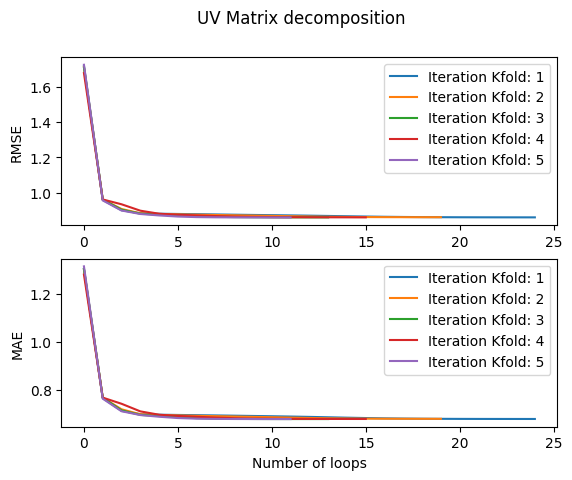

Total runtime =  278.80351758003235


In [26]:

start = time.time()

# Initialize parameters
fig, (ax1, ax2) = plt.subplots(2)
n_iter = 0
rme_list = list()
MAE_list = list()
n_splits = 5
Threshold = 0.0001
np.random.seed(123)
rand_seeds = np.random.randint(10, size = 5)

# Cross validation 
KF = KFold(n_splits=5, random_state=123, shuffle=True)

# Kfold loop (5 datasets)
for Train, Test in KF.split(dataset):
    dataset_2_Train, dataset_2_Test = dataset.loc[Train], dataset.loc[Test]

    start_local = time.time()
    # Pivot Dataset and scale the dataset
    dataset_split = dataset_2_Train.pivot(
    index='UserID',
    columns='MovieID',
    values='Ratings'
    )
    scaler = StandardScaler(with_std=False)
    dataset_split = scaler.fit_transform(dataset_split)
    dataset_split = pd.DataFrame(dataset_split)

    #Set random seeds
    np.random.seed(rand_seeds[n_iter])
    #Create Init matrices
    M = dataset_split.to_numpy()
    d = 2
    n = dataset_split.shape[0]
    m = dataset_split.shape[1]
    a = dataset_split.stack().mean()
    U = np.empty([n,d])
    V = np.empty([d,m])
    V = np.random.randn(d, m) # random numbers to increase chance of reachine global minimum
    U = np.random.randn(n, d)
    uv = np.matmul(U,V)

    # Create Init KFold dependant parameters
    halt = True
    n_iter += 1
    n_loop = 1
    l_RMSE_loop = list()
    l_MAE_loop = list()

    # Calculate initial RMSE
    dif_squared_0 = np.nan_to_num(np.square(np.subtract(uv, M)))
    dif_squared_total_sum = np.sum(dif_squared_0)
    N_non_0 = np.count_nonzero(dif_squared_0)
    RME = np.divide(dif_squared_total_sum, N_non_0)
    RMSE = np.sqrt(RME)
    l_RMSE_loop.append(RMSE)

    # Calculate initial MAE
    dif_abs = np.nan_to_num(np.abs(np.subtract(uv, M)))
    dif_abs_sum = np.sum(dif_abs)
    N_non_0_abs = np.count_nonzero(dif_abs)
    MAE = np.divide(dif_abs_sum, N_non_0_abs)
    l_MAE_loop.append(MAE)

    # Iterate as long as change of RMSE is bigger than threshold
    while halt:
        RME_old = RMSE
        n_loop+=1

        #Update U matrix
        for r in range(U.shape[0]):
            numerator = 0
            denominator = 0

            for s in range(d):
                U_rk = U[r,:]
                U_rk = np.delete(U_rk, s, 0)
                V_kj = np.delete(V, s, 0)
                V_sj = V[s,:]
                P = np.matmul(U_rk, V_kj)
                m_rj = M[r,:]
                numerator = np.multiply(V_sj,(np.subtract(m_rj, P)))
                numerator = np.nansum(np.multiply(numerator, (np.isfinite(m_rj))))
                denominator = np.square(V_sj)
                denominator = np.nansum(np.multiply(denominator, (np.isfinite(m_rj))))
                new_var = np.divide(numerator, denominator)
                U[r,s] = new_var

        #update V matrix
        for r in range(d):
            for s in range(V.shape[1]):
                V_ks = V[:,s]
                V_ks = np.delete(V_ks, r, 0)
                U_ik = np.delete(U, r, 1)
                U_ir = U[:,r]
                P = np.matmul(U_ik, V_ks)
                m_is = M[:,s]
                numerator = np.multiply(U_ir, (np.subtract(m_is, P)))
                numerator = np.nansum(np.multiply(numerator, (np.isfinite(m_is))))
                denominator = np.square(U_ir)
                denominator = np.nansum(np.multiply(denominator, (np.isfinite(m_is))))
                newvar = np.divide(numerator, denominator)
                V[r,s] = newvar

        # Matrix multiplication and comparison to original matrix M + calc MSE
        uv = np.matmul(U,V)

        # Scale back to original matrix, check if values are 1 < value < 5
        # Set values outside range to 1 or 5 and scale back
        uv = scaler.inverse_transform(uv)
        uv[uv > 5] = 5
        uv[uv < 1 ] = 1
        uv = scaler.transform(uv)
        
        # Calculate RMSE and append to list
        dif_squared_0 = np.nan_to_num(np.square(np.subtract(uv, M)))
        dif_squared_total_sum = np.sum(dif_squared_0)
        N_non_0 = np.count_nonzero(dif_squared_0)
        RME = np.divide(dif_squared_total_sum, N_non_0)
        RMSE = np.sqrt(RME)
        halt = np.abs(RMSE - RME_old) > Threshold
        l_RMSE_loop.append(RMSE)

        # Calculate MAE and append to list
        dif_abs = np.nan_to_num(np.abs(np.subtract(uv, M)))
        dif_abs_sum = np.sum(dif_abs)
        N_non_0_abs = np.count_nonzero(dif_abs)
        MAE = np.divide(dif_abs_sum, N_non_0_abs)
        l_MAE_loop.append(MAE)

    # Print results of each kfold iteration
    end_local = time.time()
    print(f'fold {n_iter}; RMSE = {RMSE}')
    print(f'fold {n_iter}; MAE = {MAE}')
    print('fold', n_iter, '; runtime = ', (end_local-start_local))
    rme_list.append(RMSE)
    MAE_list.append(MAE)
    uv_final = scaler.inverse_transform(uv)
    ax1.plot(range(n_loop), l_RMSE_loop, label = f'Iteration Kfold: {n_iter}')
    ax2.plot(range(n_loop), l_MAE_loop, label = f'Iteration Kfold: {n_iter}')

# Summarize final stats and create plots
rme_list_mean = np.mean(rme_list)
MAE_list_mean = np.mean(MAE_list)
print(f'Average RMSE over {n_iter} folds = {rme_list_mean}')
print(f'Average MAE over {n_iter} folds = {MAE_list_mean}')
plt.suptitle("UV Matrix decomposition")
plt.xlabel("Number of loops")
ax1.set_ylabel("RMSE")
ax1.legend()
ax2.set_ylabel("MAE")
ax2.legend()
plt.savefig("Figure.png")
plt.show()
ende = time.time()
print('Total runtime = ', (ende - start))

# Task 1.3 - Matrix Factorization

In [21]:



def MatrixFactorization(data, num_factors, num_iter, regularization, learn_rate, num_folds):
    start = time.time()
    
    
    # Cross validation
    
    # percentage train data (5 fold = 80% train data)
    num_folds = num_folds
    
    # Create RMSE for train and test for every fold
    RMSE_fold_train = [0] * num_folds
    RMSE_fold_test = [0] * num_folds
    MAE_fold_train = [0] * num_folds
    MAE_fold_test = [0] * num_folds


    sequence_of_data = [x % num_folds for x in range(len(data))]
    np.random.shuffle(sequence_of_data)
    data_matrix = data.pivot(index='UserID',    columns='MovieID',    values='Ratings').fillna(0)
    data_matrix = np.asarray(data_matrix)

    for fold in range(num_folds):
        start_local = time.time()
        
        train_index = np.array([x != fold for x in sequence_of_data])
        test_index = np.array([x == fold for x in sequence_of_data])
        train = data[train_index]
        test = data[test_index]
                
        # make an array of the data
        #train_array = np.array(train)
        #test_array = np.array(test)
        train_matrix = train.pivot(index='UserID',    columns='MovieID',    values='Ratings').fillna(0)
        test_matrix = test.pivot(index='UserID',    columns='MovieID',    values='Ratings').fillna(0)
        train = np.asarray(train)
        test = np.asarray(test)
        train_matrix = np.asarray(train_matrix)
        test_matrix = np.asarray(test_matrix)
        
        # Specifiy the I and J for the matrices 
        I = data_matrix.shape[0]
        J = data_matrix.shape[1]
        K = num_factors
        
        # Initialize random weights
        U = np.random.rand(I, K)
        M = np.random.rand(K, J)
                
        # Create empty list for train and test
        RMSE_list_train = []
        RMSE_list_test = []
        MAE_list_train = []
        MAE_list_test = []
        
        for iter in range(num_iter):
            e_ij2 = 0
            e_ij2_test = 0
            abs_e_ij2 = 0
            abs_e_ij2_test = 0
            # if the value in the matrix is higher than 0, for every i and j
            for i in range(len(train_matrix)):
                for j in range(train_matrix.shape[1]):
                    if train_matrix[i][j]>0:
                      
                      # calculate the prediction with the intiliazed weights
                        pred = np.dot(U[i,:], M[:,j])

                        # Keep ratings between 1 and 5
                        if pred < 1:
                            pred = 1
                        elif pred > 5:
                            pred = 5

                        # Calculate the error 
                        e_ij = train_matrix[i][j] - pred
                        e_ij2 += (e_ij)**2
                        abs_e_ij2 += np.abs(e_ij)


                        #Update the weights
                        for k in range(num_factors):
                            grad_eij_u = -2 * e_ij * M[k][j]
                            grad_eij_m = -2 * e_ij * U[i][k]

                            U[i][k] = U[i][k] + learn_rate * ( - grad_eij_u - regularization * U[i][k] )
                            M[k][j] = M[k][j] + learn_rate * ( - grad_eij_m - regularization * M[k][j] )


            # N: the number of known values in the Matrix
            N = np.count_nonzero(train_matrix)
            RMSE_iter_train = np.sqrt(e_ij2 / N)
            print('Train RMSE:', {RMSE_iter_train})
            MAE_iter_train = np.sqrt(abs_e_ij2/N)
            print('Train MAE:', {MAE_iter_train})

            RMSE_list_train.append(RMSE_iter_train)
            MAE_list_train.append(MAE_iter_train)

            

            
            # if the value in the matrix is higher than 0, for every i and j Test
            for i in range(len(test_matrix)):
                for j in range(test_matrix.shape[1]):
                    if test_matrix[i][j]>0:
                        # calculate the prediction with the weights Test
                        pred = np.dot(U[i,:], M[:,j])

                        # Keep ratings between 1 and 5
                        if pred < 1:
                            pred = 1
                        elif pred > 5:
                            pred = 5

                        # Calculate the error Test
                        e_ij_test = test_matrix[i][j] - pred
                        e_ij2_test += (e_ij_test)**2
                        abs_e_ij2_test += np.abs(e_ij_test)
                            
            # N: the number of known values in the Matrix
            N_test = np.count_nonzero(test_matrix)
            RMSE_iter_test = np.sqrt(e_ij2_test / N_test)
            MAE_iter_test = np.sqrt(abs_e_ij2_test/N_test)
            print('Test RMSE:', {RMSE_iter_test})
            print('Test MAE:', {MAE_iter_test})

            RMSE_list_test.append(RMSE_iter_test)
            MAE_list_test.append(MAE_iter_test)
            
            # Only continue if the new RMSE is better than the previous RMSE
            if len(RMSE_list_train) >= 2 or len(RMSE_list_train) >= 2:
                if RMSE_list_train[-2] <= RMSE_list_train[-1]:
                    break
                elif RMSE_list_test[-2] <= RMSE_list_test[-1]:
                    break
        
            
        RMSE_fold_train[fold] = RMSE_list_train[-1]
        RMSE_fold_test[fold] = RMSE_list_test[-1]
        MAE_fold_train[fold] = MAE_list_train[-1]
        MAE_fold_test[fold] = MAE_list_test[-1]


        print('List RMSE train fold:', RMSE_fold_train)
        print('List RMSE test fold:',RMSE_fold_test)
        print('List MAE train fold:',MAE_fold_train)
        print('List MAE test fold:',MAE_fold_test)
        end_local = time.time()
        print('iter time: ', (end_local - start_local))
        
    print('List RMSE train average over folds:', np.mean(RMSE_fold_train))
    print('List RMSE test average over folds:',np.mean(RMSE_fold_test))
    print('List MAE train average over folds:',np.mean(MAE_fold_train))
    print('List MAE test average over folds:',np.mean(MAE_fold_test))
    
    end = time.time()
    print('Total runtime = ', (end - start))
    return U, M

In [22]:
nU, nM = MatrixFactorization(dataset, num_factors=10, num_iter=75, regularization=0.05, learn_rate=0.005, num_folds = 5)
nU, nM

Train RMSE: {0.9915435733299518}
Train MAE: {0.8883904229043805}
Test RMSE: {1.338836945856958}
Test MAE: {1.0423791928958652}
Train RMSE: {0.9248333550111637}
Train MAE: {0.855288543754858}
Test RMSE: {1.3304852334786768}
Test MAE: {1.0414886090869586}
Train RMSE: {0.9148630064554439}
Train MAE: {0.8508690175850805}
Test RMSE: {1.3294232078187662}
Test MAE: {1.0407065545595826}
Train RMSE: {0.910113640200606}
Train MAE: {0.848667114149881}
Test RMSE: {1.3294547158947827}
Test MAE: {1.0402109733298908}
List RMSE train fold: [0.910113640200606, 0, 0, 0, 0]
List RMSE test fold: [1.3294547158947827, 0, 0, 0, 0]
List MAE train fold: [0.848667114149881, 0, 0, 0, 0]
List MAE test fold: [1.0402109733298908, 0, 0, 0, 0]
iter time:  127.09138226509094
Train RMSE: {0.9899695609707742}
Train MAE: {0.8877722598744728}
Test RMSE: {1.3579619398603187}
Test MAE: {1.049612012214779}
Train RMSE: {0.9247609043984334}
Train MAE: {0.8552555357503556}
Test RMSE: {1.350034179139087}
Test MAE: {1.04908742368

(array([[0.42003102, 0.10617977, 0.94339166, ..., 0.3476118 , 0.93933   ,
         0.86894866],
        [0.72986328, 0.46063994, 0.6813315 , ..., 0.43275536, 0.45437982,
         0.50678922],
        [0.35615158, 0.70455072, 0.33935662, ..., 0.30364886, 0.79158291,
         0.68913409],
        ...,
        [0.52553694, 0.75454011, 0.60910616, ..., 0.45877862, 0.52132771,
         0.35373423],
        [0.79788442, 0.81074753, 0.54297693, ..., 0.37089762, 0.75366426,
         0.40864825],
        [0.29337146, 0.52727026, 0.28332051, ..., 0.49927521, 0.83716131,
         0.73524041]]),
 array([[0.96145772, 0.34275003, 0.25942709, ..., 0.39203461, 0.96544835,
         0.24496022],
        [0.45559929, 0.50229948, 0.50308743, ..., 0.50810929, 0.45399633,
         0.17505867],
        [0.69249096, 0.70429529, 0.28155033, ..., 0.20614615, 0.15699857,
         0.69630004],
        ...,
        [0.6958677 , 0.53813473, 0.46121569, ..., 0.02329751, 0.38825781,
         0.07324789],
        [0.7

In [ ]:
nR = np.dot(nU,nM)
nR

In [ ]:
nM

In [ ]:
pd.DataFrame(nU).to_csv('Usermatrix.csv')  
pd.DataFrame(nM).to_csv('Moviematrix.csv')  
#pd.DataFrame(nR).to_csv('total_matrix.csv')  